In [176]:
from collections import Counter
import math, random

Utilizaremos un datframe recabado de una pulsera fitbit para ver como esta funcionando el ciclo de sueño del usuario que los registro

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('./recursos/sleepDay_merged.csv')
print(df)


             Id    SleepDay      Time  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  12/04/2016  00:00:00                  1                 327   
1    1503960366  13/04/2016  12:00:00                  2                 384   
2    1503960366  15/04/2016  12:00:00                  1                 412   
3    1503960366  16/04/2016  12:00:00                  2                 340   
4    1503960366  17/04/2016  12:00:00                  1                 700   
..          ...         ...       ...                ...                 ...   
408  8792009665  30/04/2016  12:00:00                  1                 343   
409  8792009665  01/05/2016  00:00:00                  1                 503   
410  8792009665  02/05/2016  00:00:00                  1                 415   
411  8792009665  03/05/2016  00:00:00                  1                 516   
412  8792009665  04/05/2016  00:00:00                  1                 439   

     TotalTimeInBed  
0               3

In [178]:
#Obtenemos el largo de el dataframe
print(len(df))

413


In [179]:
#Vemos que fraccion vamos a utilizar del df para entrenamiento
a = random.uniform(0.5, 1)
print(a)

0.9520562899210367


In [180]:
def split_data(data, prob):
    prob = (int(prob*10))/10
    #print(prob)
    colamayor = int(len(data)*prob)
    colamenor = int(len(data)-len(data)*prob)
    
    dfs = np.array_split(data, [colamayor,colamenor+colamayor] , axis=0)


    return dfs

In [181]:
x = split_data(df, a)
print(x)

[             Id    SleepDay      Time  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  12/04/2016  00:00:00                  1                 327   
1    1503960366  13/04/2016  12:00:00                  2                 384   
2    1503960366  15/04/2016  12:00:00                  1                 412   
3    1503960366  16/04/2016  12:00:00                  2                 340   
4    1503960366  17/04/2016  12:00:00                  1                 700   
..          ...         ...       ...                ...                 ...   
366  8378563200  12/04/2016  00:00:00                  1                 338   
367  8378563200  13/04/2016  12:00:00                  2                 447   
368  8378563200  14/04/2016  12:00:00                  1                 424   
369  8378563200  15/04/2016  12:00:00                  1                 513   
370  8378563200  16/04/2016  12:00:00                  2                 611   

     TotalTimeInBed  
0               

In [182]:
TiempoDormido = df[:100][['TotalMinutesAsleep', 'TotalTimeInBed']]

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

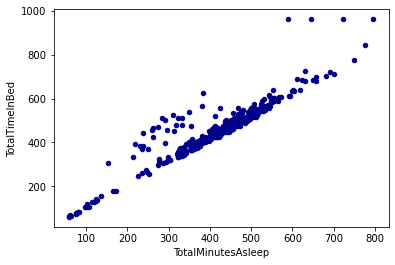

In [183]:
df.plot.scatter(x='TotalMinutesAsleep',
                       y='TotalTimeInBed',
                       c='DarkBlue')



In [184]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(TiempoDormido)

In [185]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.01010101 0.89601751]
 [0.89601751 1.01010101]]


In [186]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.1140835  1.90611852]


In [187]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
1.9061185183988223
0.11408350180319793


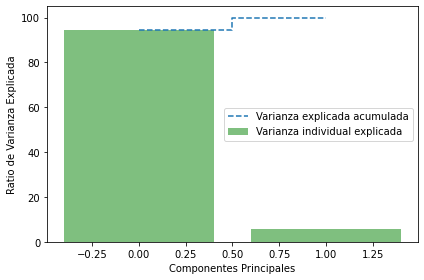

In [188]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada

plt.figure(figsize=(6, 4))

plt.bar(range(2), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
plt.step(range(2), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [189]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [211]:
type(Y)

numpy.ndarray

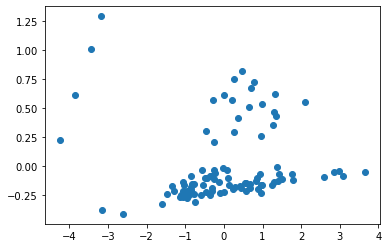

In [216]:
plt.scatter(Y[:,0], Y[:,1])

In [ ]:
TiempoDormido[:2:]

,TotalMinutesAsleep,TotalTimeInBed
0,327,346
1,384,407


In [ ]:
def train_test_split(x, y, test_pct):
    data = list(zip(x, y))                        # pair corresponding values
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = list(zip(*train))          # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

In [ ]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)

    return 2 * p * r / (p + r)

if __name__ == "__main__":

    print("accuracy(70, 4930, 13930, 981070)", accuracy(70, 4930, 13930, 981070))
    print("precision(70, 4930, 13930, 981070)", precision(70, 4930, 13930, 981070))
    print("recall(70, 4930, 13930, 981070)", recall(70, 4930, 13930, 981070))
    print("f1_score(70, 4930, 13930, 981070)", f1_score(70, 4930, 13930, 981070))

accuracy(70, 4930, 13930, 981070) 0.98114
precision(70, 4930, 13930, 981070) 0.014
recall(70, 4930, 13930, 981070) 0.005
f1_score(70, 4930, 13930, 981070) 0.00736842105263158


Aproximadamente 5 de cada 1,000 bebes son llamados Luke , Y la prevalencia que exista una condicion de leucemia es de 1.4% o 14 de cada 1000 neonatos

|  | Leucemia |No Leucemia | Total |
| ----------- | ----------- |----------- |----------- |
| Paciente | 70 | 4930 | 5000 |
| Otros Pacientes | 13930 | 981070 | 995000 |
| Total | 14000 | 986000 | 1000000 |

In [ ]:
#Fraccion de predicciones correctas
print(accuracy(70,4930,13930,981070))

0.98114


La precision mide como de acertado es positiva nuestra prediccion

In [ ]:
print(precision(70,4930,13930,981070))

0.014


Y recall mide cual fraccion de nuestros positivos es identificado por el modelo

In [ ]:
print(recall(70,4930,13930,981070))

0.005


Estos son numeros terribles , reflejando que es un modelo terrible

In [ ]:
f1_score(70,4930,13930,981070)

0.00736842105263158